In [1]:
'''
INF 385T UTexas:: byron wallace
Sp 2016
in class exercise 1 solution
'''
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
%matplotlib inline  
matplotlib.style.use('ggplot')

In [6]:
ls

Untitled.ipynb               in-class-exercise1.ipynb
Untitled1.ipynb              prob-and-stat-101.ipynb
heights_weights_genders.csv


In [7]:
d = pd.read_csv("heights_weights_genders.csv")

In [8]:
d.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


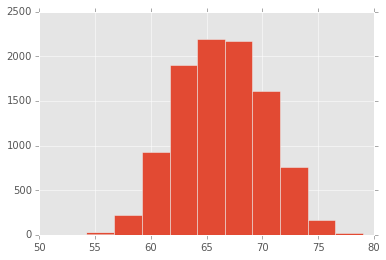

In [9]:
all_heights = d["Height"].values
hist = plt.hist(all_heights)

In [6]:
def estimate_mu(data):
    return sum(data) / len(data)

def estimate_variance(data, mu=None):
    if mu is None:
        mu = estimate_mu(data)
    return sum([(x - mu)**2 for x in data]) / len(data)
    

In [7]:
estimate_mu(d["Height"].values)

66.367559754821059

In [8]:
estimate_variance(d["Height"].values)

14.80199229287679

In [9]:
d.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [10]:
male_heights = d[d["Gender"] == "Male"]["Height"].values
female_heights = d[d["Gender"] == "Female"]["Height"].values

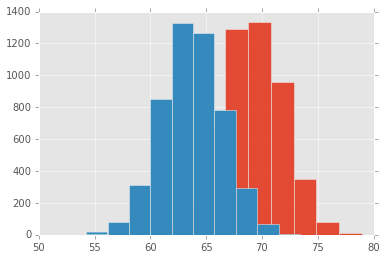

In [11]:
hist = plt.hist(male_heights)
hist = plt.hist(female_heights)

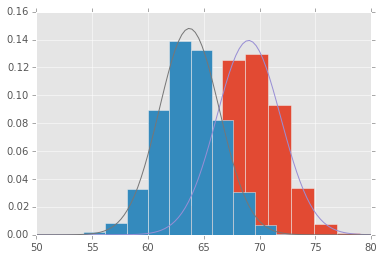

In [12]:
# note that we need to norm the histograms here
# or the fitted lines won't show.
hist = plt.hist(male_heights,normed=True)
hist = plt.hist(female_heights,normed=True)
# just create 100 points between 50 and 80
x_range = np.linspace(50, 80, 100)
# as before
m_mu, m_var = estimate_mu(male_heights), estimate_variance(male_heights)
# note that we do sqrt because normpdf wants a std dev (not variance)
plt.plot(x_range, mlab.normpdf(x_range, m_mu, math.sqrt(m_var)))
f_mu, f_var = estimate_mu(female_heights), estimate_variance(female_heights)
plt.plot(x_range, mlab.normpdf(x_range, f_mu, math.sqrt(f_var)))